In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [22]:
pip install scikit-learn

  Using cached scikit_learn-1.3.2-cp310-cp310-win_amd64.whl (9.3 MB)
  Using cached scipy-1.11.3-cp310-cp310-win_amd64.whl (44.1 MB)
  Using cached joblib-1.3.2-py3-none-any.whl (302 kB)
  Using cached threadpoolctl-3.2.0-py3-none-any.whl (15 kB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Lets load the Boston House Pricing Dataset

In [2]:
dataset = pd.read_csv("bostonhousing.csv")

## Preparing The Dataset

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [4]:
dataset.rename(columns={"MEDV": "Price"},inplace=True)

In [5]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  Price    506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


In [7]:
## Summarizing The Stats of the data
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [8]:
## Check the missing Values
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
Price      0
dtype: int64

In [9]:
### EXploratory Data Analysis
## Correlation
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


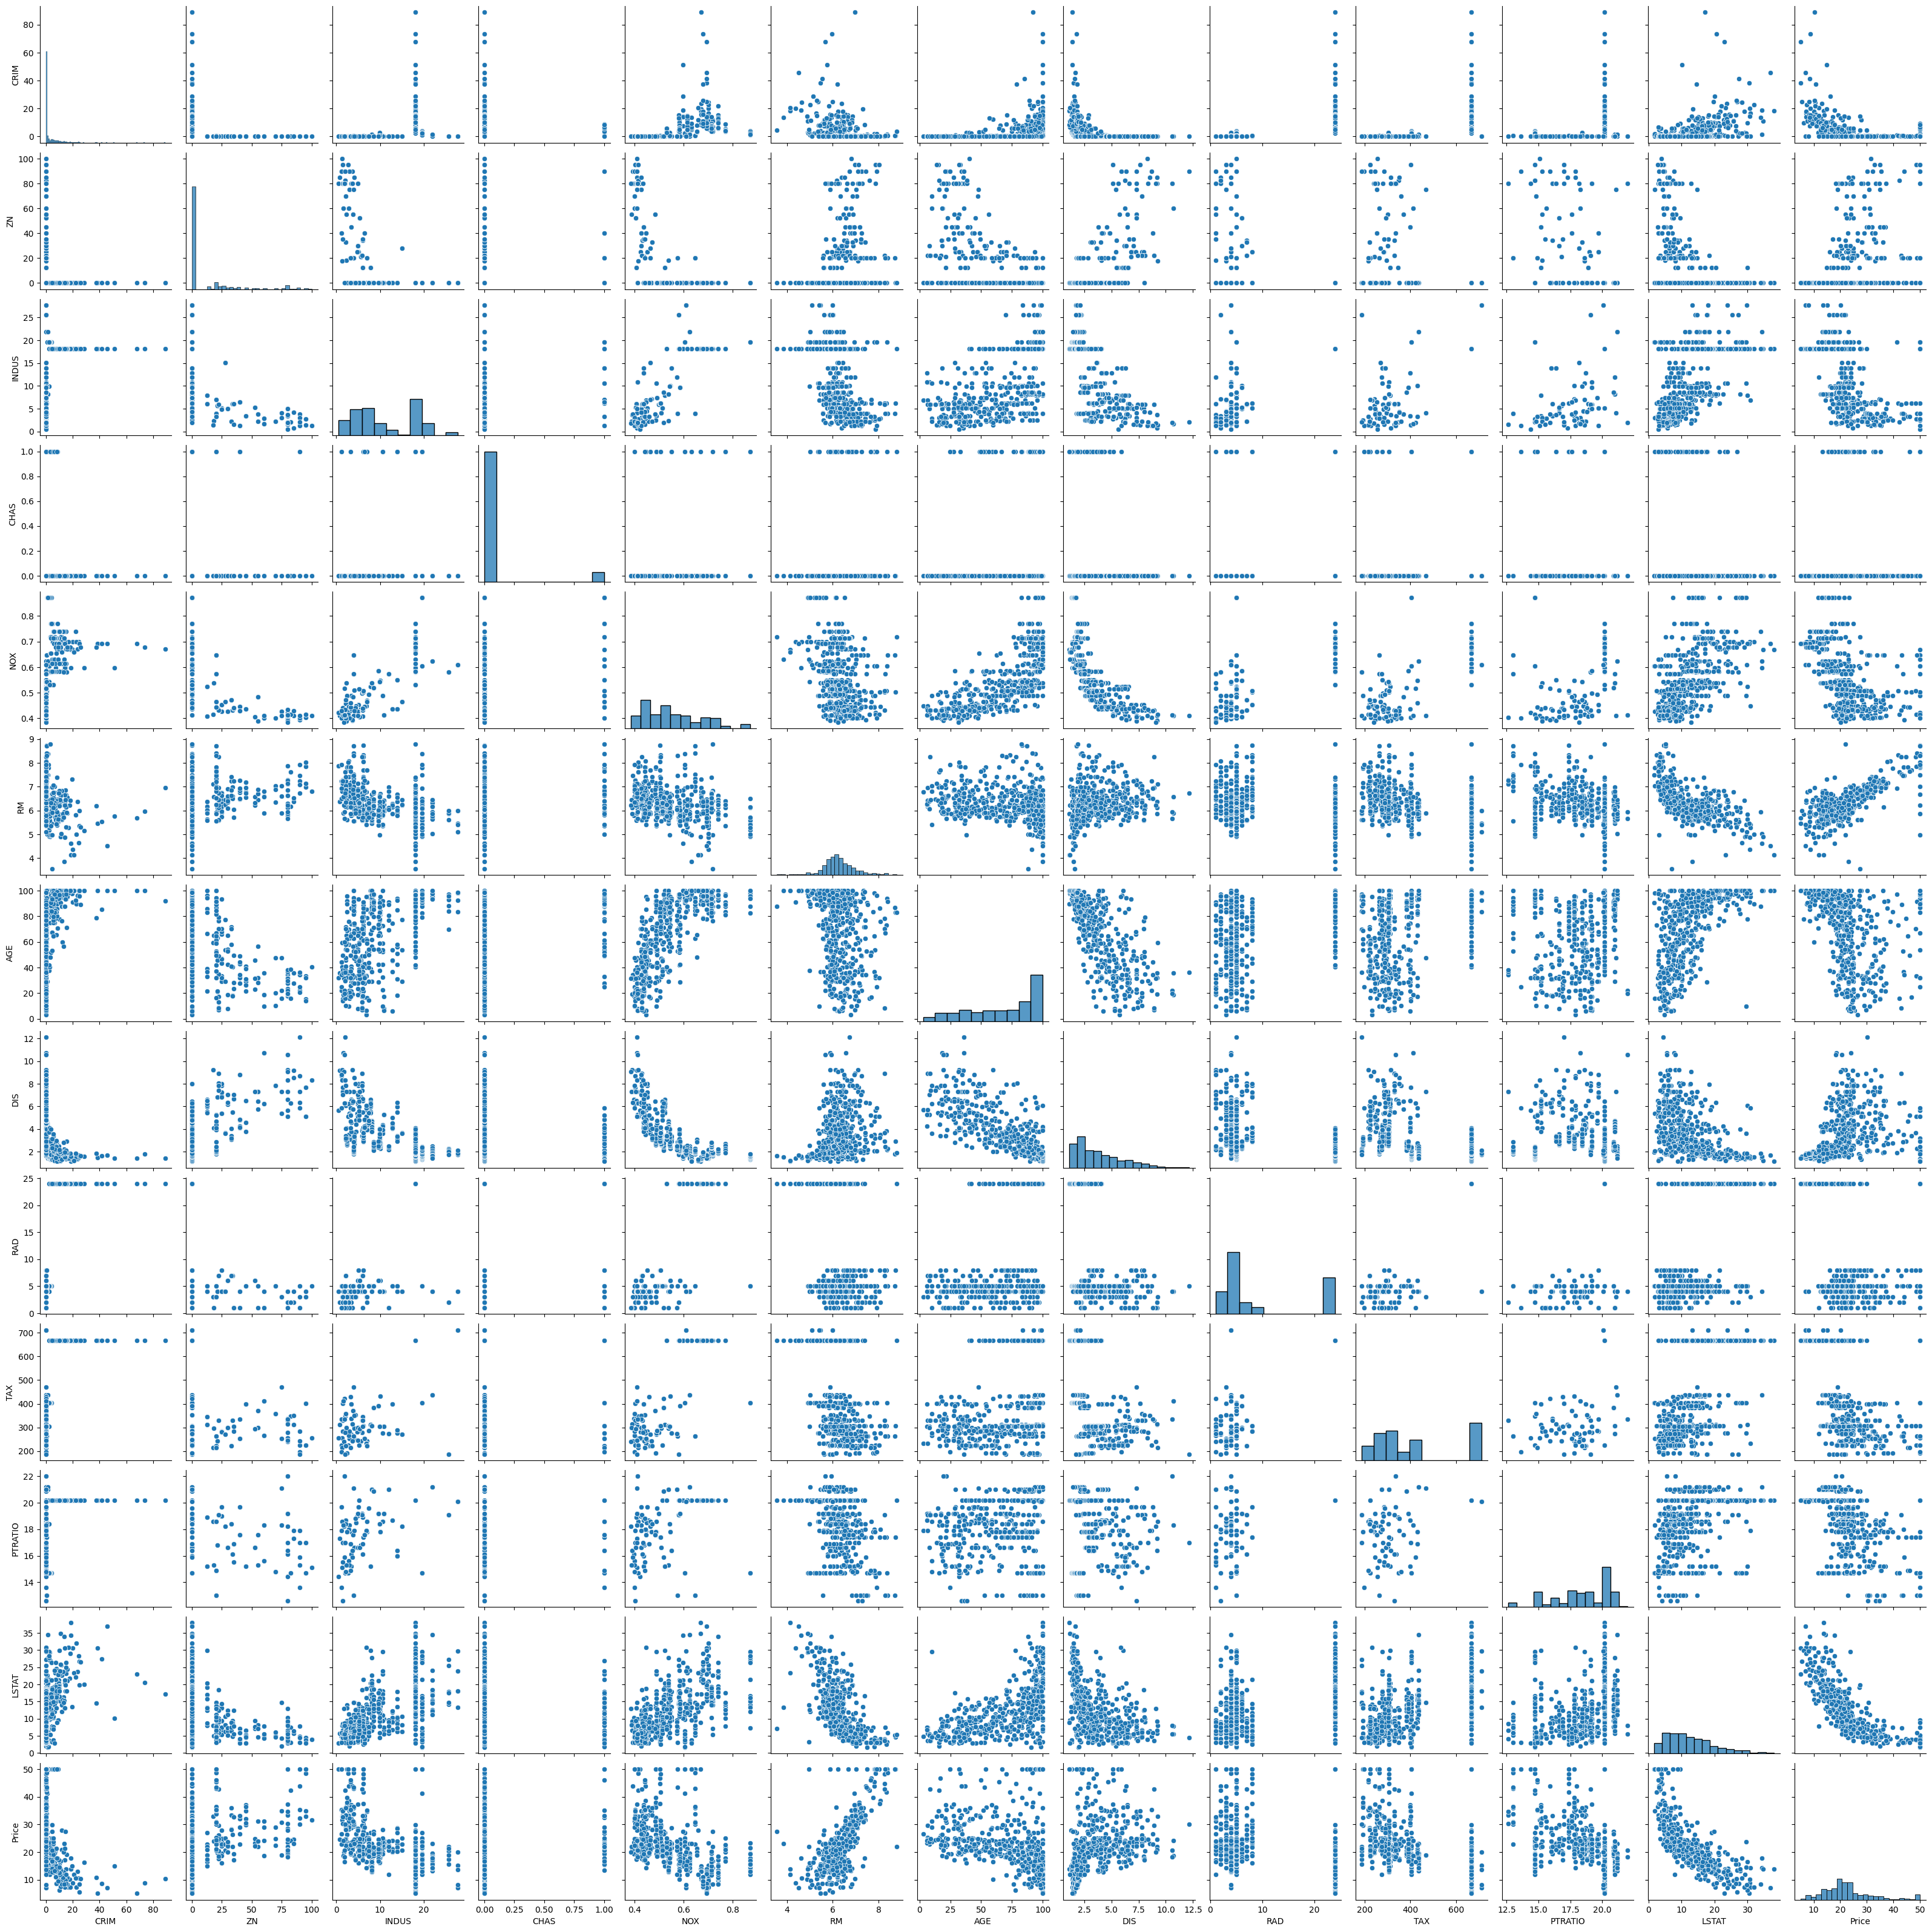

In [10]:
import seaborn as sns
sns.pairplot(dataset)

## Analyzing The Correlated Features

In [11]:
dataset.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,Price
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,0.543993,-0.468536


Text(0, 0.5, 'Price')

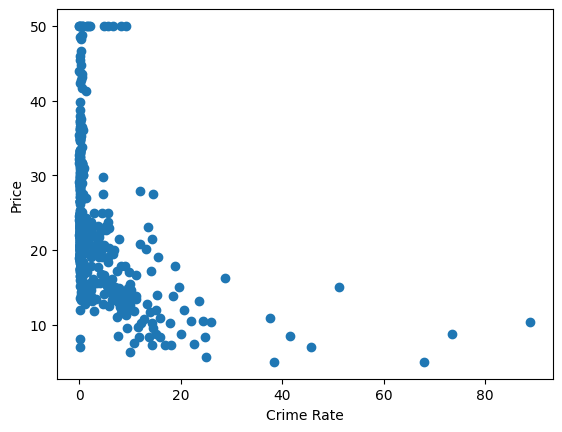

In [12]:
plt.scatter(dataset['CRIM'],dataset['Price'])
plt.xlabel("Crime Rate")
plt.ylabel("Price")

Text(0, 0.5, 'Price')

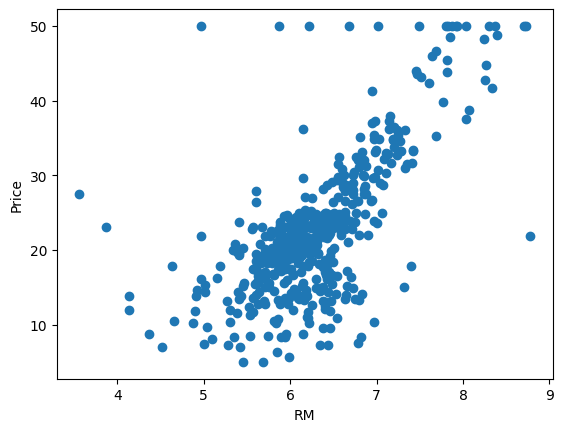

In [13]:
plt.scatter(dataset['RM'],dataset['Price'])
plt.xlabel("RM")
plt.ylabel("Price")

<Axes: xlabel='RM', ylabel='Price'>

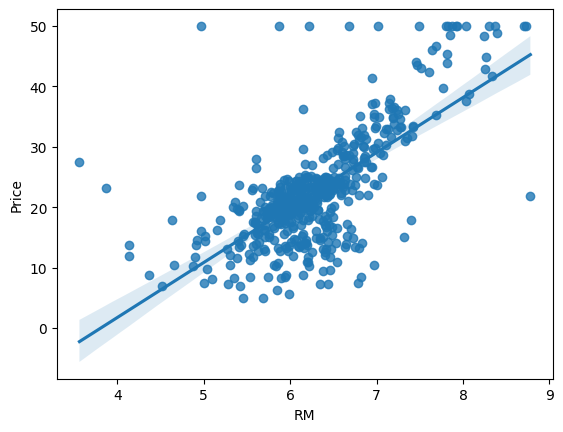

In [14]:
import seaborn as sns
sns.regplot(x="RM",y="Price",data=dataset)

<Axes: xlabel='LSTAT', ylabel='Price'>

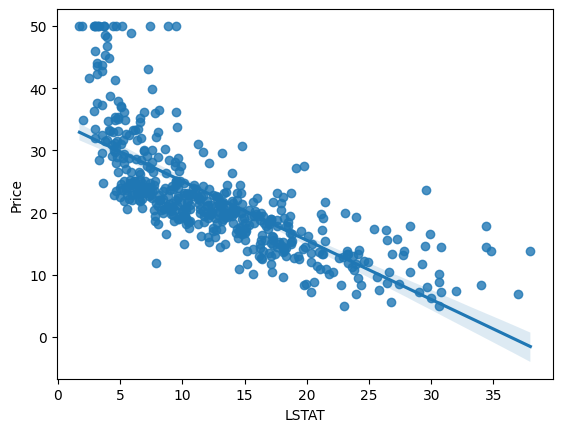

In [15]:
sns.regplot(x="LSTAT",y="Price",data=dataset)

<Axes: xlabel='CHAS', ylabel='Price'>

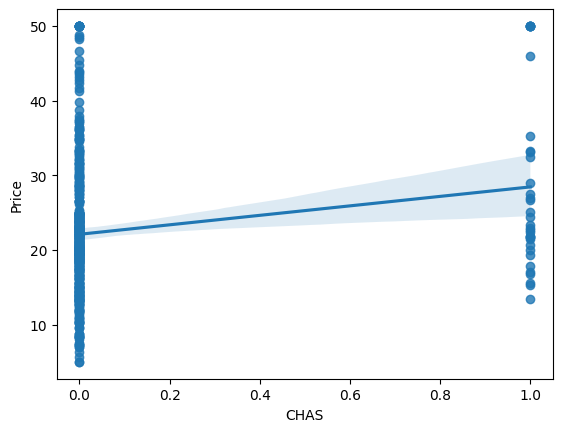

In [16]:
sns.regplot(x="CHAS",y="Price",data=dataset)

<Axes: xlabel='PTRATIO', ylabel='Price'>

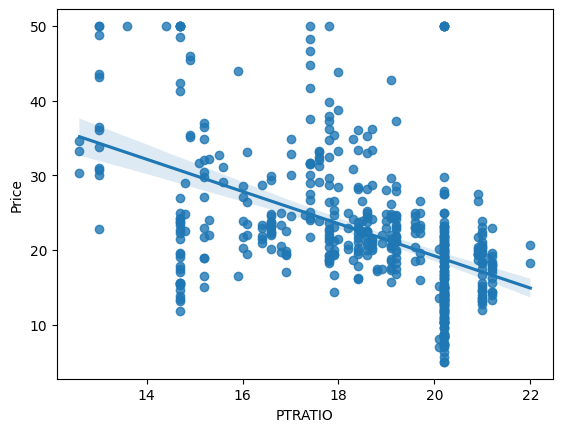

In [17]:
sns.regplot(x="PTRATIO",y="Price",data=dataset)

In [18]:
## Independent and Dependent features

X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [19]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


In [20]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [23]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [24]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,5.21
116,0.13158,0.0,10.01,0,0.547,6.176,72.5,2.7301,6,432,17.8,12.04
45,0.17142,0.0,6.91,0,0.448,5.682,33.8,5.1004,3,233,17.9,10.21
16,1.05393,0.0,8.14,0,0.538,5.935,29.3,4.4986,4,307,21.0,6.58
468,15.57570,0.0,18.10,0,0.580,5.926,71.0,2.9084,24,666,20.2,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0,0.520,5.836,91.9,2.2110,5,384,20.9,18.66
270,0.29916,20.0,6.96,0,0.464,5.856,42.1,4.4290,3,223,18.6,13.00
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,5.99
435,11.16040,0.0,18.10,0,0.740,6.629,94.6,2.1247,24,666,20.2,23.27


In [25]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296,16.6,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254,17.6,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711,20.1,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305,19.2,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666,20.2,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...
441,9.72418,0.0,18.10,0,0.740,6.406,97.2,2.0651,24,666,20.2,19.52
23,0.98843,0.0,8.14,0,0.538,5.813,100.0,4.0952,4,307,21.0,19.88
225,0.52693,0.0,6.20,0,0.504,8.725,83.0,2.8944,8,307,17.4,4.63
433,5.58107,0.0,18.10,0,0.713,6.436,87.9,2.3158,24,666,20.2,16.22


In [26]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_train=scaler.fit_transform(X_train)

In [28]:
X_test=scaler.transform(X_test)

In [29]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [30]:
X_train

array([[-0.41425879, -0.50512499, -1.29214218, ..., -1.11279004,
         0.18727079, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ...,  0.15008778,
        -0.21208981, -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -1.0466393 ,
        -0.16771641, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.76399522,
        -0.56707702, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ..., -0.13857001,
         1.16348561, -0.25218837]])

In [31]:
X_test

array([[-0.406801  , -0.50512499, -1.02225586, ..., -0.66777595,
        -0.74457062, -0.47605794],
       [-0.41105674,  1.26662874, -0.68165068, ..., -0.92035152,
        -0.30083661, -1.25185755],
       [-0.4051199 , -0.50512499,  2.39678516, ...,  1.82791117,
         0.8084984 ,  0.79535229],
       ...,
       [-0.35439903, -0.50512499, -0.71195877, ..., -0.60162521,
        -0.38958342, -1.09697922],
       [ 0.25423453, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  0.53487511],
       [ 0.77732457, -0.50512499,  1.00549958, ...,  1.5572945 ,
         0.8528718 ,  0.56585078]])

## Model Training

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
regression=LinearRegression()

In [38]:
regression.fit(X_train,y_train)

LinearRegression()

In [39]:
## print the coefficients and the intercept
print(regression.coef_)

[-1.16096196  0.81544469  0.25150446  0.90388642 -1.86406727  2.8008198
 -0.24506311 -2.94795852  1.89664169 -1.52987704 -2.00684723 -4.07422149]


In [40]:
print(regression.intercept_)

23.01581920903955


In [41]:
## on which parameters the model has been trained
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [42]:
### Prediction With Test Data
reg_pred=regression.predict(X_test)

In [43]:
reg_pred

array([28.57094774, 36.81549468, 14.77342714, 25.40879164, 17.83709907,
       23.16449335, 17.15522701, 13.49000152, 22.13052286, 20.28195952,
       24.78234243, 18.30984099, -4.85443361, 21.6241052 , 19.24399263,
       25.34909243, 20.11888967,  4.57693599, 40.32947719, 16.4011725 ,
       27.42039613, 30.09145823, 11.07523442, 23.96296133, 17.90714413,
       15.47494417, 22.94468805, 17.87544105, 22.49189601, 19.03202569,
       22.06247478, 25.11072892, 24.04433573, 17.86692173, 16.25957928,
       18.44827257, 30.96796371, 20.17403234, 24.19001512, 24.95168383,
       13.5253433 , 31.7582742 , 42.47240344, 17.52748697, 27.07696462,
       16.16466286, 14.07453935, 26.10426805, 19.26722596, 30.11274101,
       21.06774008, 34.11059788, 15.33667916, 25.964418  , 39.13846857,
       22.10873004, 17.84275474, 33.09663034, 24.80711674, 12.76610932,
       22.46769932, 30.75208688, 31.64525856, 17.49348348, 21.3470605 ,
       16.64731915, 19.24441479, 26.15659269, 31.14392822, 15.38

## Assumptions

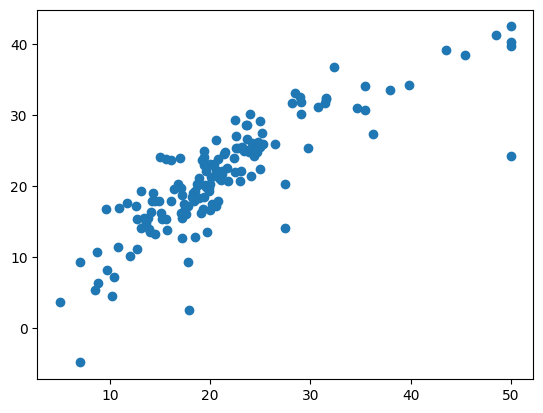

In [44]:
## plot a scatter plot for the prediction
plt.scatter(y_test,reg_pred)

In [45]:
## Residuals
residuals=y_test-reg_pred

In [46]:
residuals

173    -4.970948
274    -4.415495
491    -1.173427
72     -2.608792
452    -1.737099
         ...    
441     0.834959
23      1.315560
225    10.270386
433    -4.720224
447    -4.620123
Name: Price, Length: 152, dtype: float64

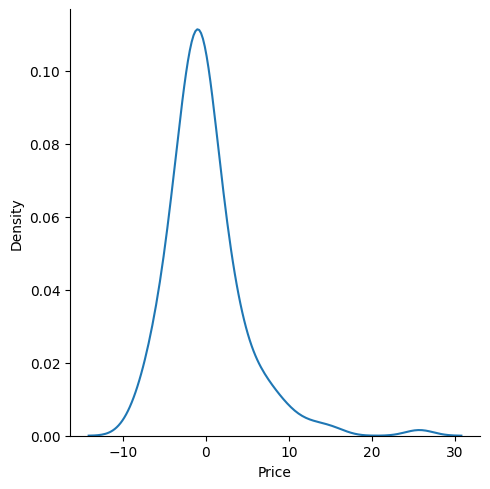

In [47]:
## Plot this residuals 

sns.displot(residuals,kind="kde")

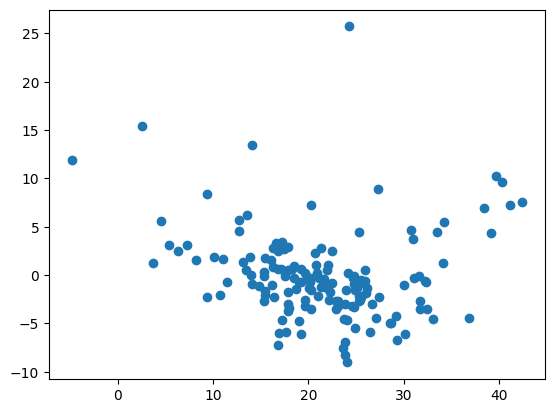

In [48]:
## Scatter plot with respect to prediction and residuals
## uniform distribution
plt.scatter(reg_pred,residuals)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.188662231942636
21.115450613869573
4.59515512402678


## R square and adjusted R square


Formula

**R^2 = 1 - SSR/SST**


R^2	=	coefficient of determination
SSR	=	sum of squares of residuals
SST	=	total sum of squares


In [50]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
print(score)

0.7166209449097779


**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model
n: The number of observations
k: The number of predictor variables

In [51]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6921565660530681

## Pickling The Model file For Deployment

In [55]:
import pickle

In [56]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [57]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))